In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# import dataset
ver3_data = pd.read_csv('/Users/huafa/Downloads/stock_polarity_ver3.csv')
tweet_bayes = pd.read_csv('/Users/huafa/Downloads/nb_tweet_pred.csv')

data = pd.merge(ver3_data, tweet_bayes, on='date', how='left')


data['sentiment_bayes'] = data['sentiment_bayes'].replace({'positive': 1, 'negative': 0})




In [4]:
data.head()

,Unnamed: 0,date,btc_open,btc_close,btc_volume,nasdaq_close,dji_close,sp_close,oil_close,gold_close,...,dji_2d,dji_3d,compound,positive,negative,neutral,tweet,sentiment_bayes,sentiment_rf,sentiment_dt
0,2,2021-02-04,37475.105469,36926.066406,68838074392,13777.740234,31055.900391,3871.739990,56.230000,1788.900024,...,30687.500000,30211.900391,-0.4228,0.056,0.122,0.822,the most entertaining outcome is the most like...,0,negative,negative
1,3,2021-02-05,36931.546875,38144.308594,58598066402,13856.299805,31148.199219,3886.830078,56.849998,1810.900024,...,30723.599609,30687.500000,0.9568,0.121,0.036,0.843,yeah by default engine with least lever arm wo...,0,negative,positive
2,4,2021-02-06,38138.386719,39266.011719,71326033653,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,...,31055.900391,30723.599609,0.6249,0.111,0.000,0.889,thatdamianjustscratchthe future currency of ea...,1,positive,positive
3,5,2021-02-07,39250.191406,38903.441406,65500641143,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,...,31148.199219,31055.900391,0.6471,0.122,0.038,0.840,lessons learnedhave you read itgreattime to te...,1,positive,positive
4,6,2021-02-08,38886.828125,46196.464844,101467222687,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,...,31385.800781,31148.199219,0.7143,0.092,0.044,0.865,back to work tonighthodl the rainforestswho le...,0,negative,negative


/var/folders/7q/1lqjtlwj07xd17mwql4bq91h0000gn/T/ipykernel_5374/3057312830.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


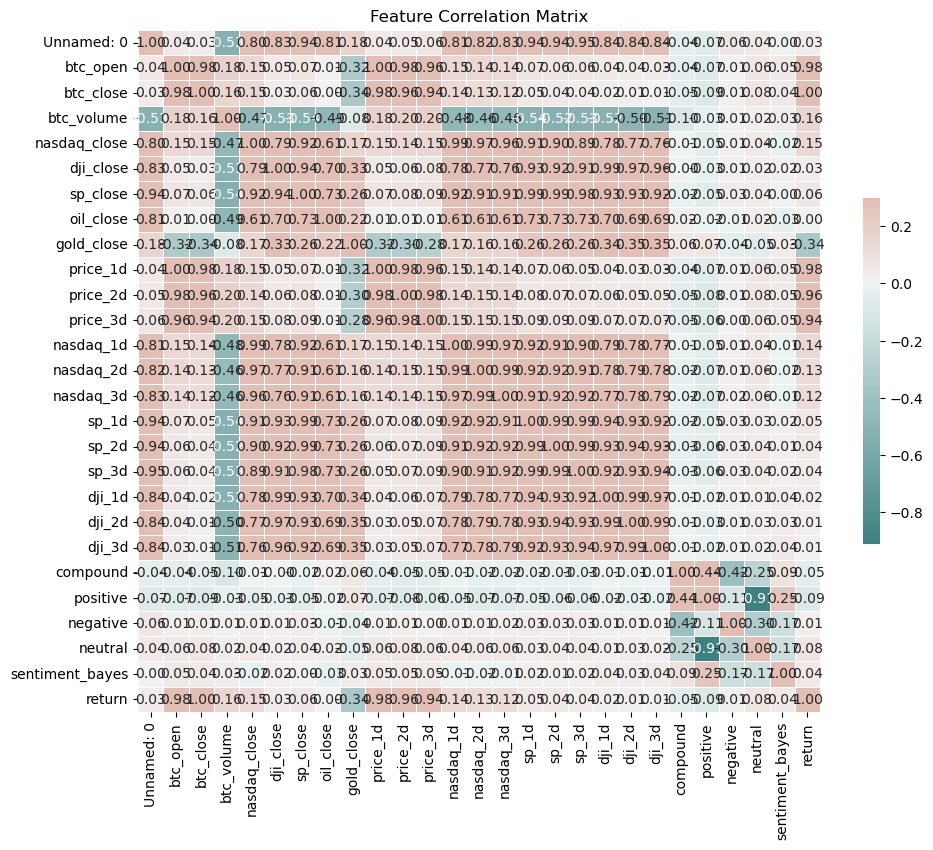

   Unnamed: 0      btc_open     btc_close    btc_volume  nasdaq_close  \
0           2  37475.105469  36926.066406   68838074392  13777.740234   
1           3  36931.546875  38144.308594   58598066402  13856.299805   
2           4  38138.386719  39266.011719   71326033653  13987.639648   
3           5  39250.191406  38903.441406   65500641143  13987.639648   
4           6  38886.828125  46196.464844  101467222687  13987.639648   

      dji_close     sp_close  oil_close   gold_close      price_1d  ...  \
0  31055.900391  3871.739990  56.230000  1788.900024  37472.089844  ...   
1  31148.199219  3886.830078  56.849998  1810.900024  36926.066406  ...   
2  31385.800781  3915.590088  57.970001  1831.900024  38144.308594  ...   
3  31385.800781  3915.590088  57.970001  1831.900024  39266.011719  ...   
4  31385.800781  3915.590088  57.970001  1831.900024  38903.441406  ...   

         dji_3d  compound  positive  negative  neutral  \
0  30211.900391   -0.4228     0.056     0.122    0.8

In [6]:

"""
Correlation matrix for feature selection

"""

corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(550, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.set_title('Feature Correlation Matrix')
plt.show()

# Calculate the return rate
data['return'] = data['btc_close']

# data.to_csv('/return_polarity.csv')
data.dropna(inplace=True)
data.drop("date",axis=1,inplace=True)

print(data.head(5))




In [8]:

"""
Selecting features and target

"""
# baseline

x = data[['btc_volume', 'nasdaq_close','dji_close','sp_close', 'oil_close', 'gold_close']]
y = data['return']
# situation 1: add polarity score as one of the predictors
x_1 = data[['btc_volume', 'nasdaq_close','dji_close','sp_close', 'oil_close', 'gold_close','compound']]
x_2 = data[['btc_volume', 'nasdaq_close','dji_close','sp_close', 'oil_close', 'gold_close','sentiment_bayes']]

"""
Data partition

"""
# baseline
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print('Data Split for baseline done.')

# situation 1: add polarity score as one of the predictors
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y, test_size=0.20, random_state=0)
print('Data Split for situation 1 done.')

# situation 2: add bayes sentiment as one of the predictors
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y, test_size=0.20, random_state=0)
print('Data Split for situation 2 done.')




Data Split for baseline done.
Data Split for situation 1 done.
Data Split for situation 2 done.


In [9]:
"""
Prediction models - Training

"""
# Linear Regression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train) # -------- baseline

linear_model1 = LinearRegression()
linear_model1.fit(x_train1, y_train1) # -------- situation 1

linear_model2 = LinearRegression()
linear_model2.fit(x_train2, y_train2) # -------- situation 1


# Random Forest
# Defining the parameter grid for tuning the Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth':[None, 5, 10],
    'min_samples_split': [5, 10]
}

# Initializing GridSearchCV for the baseline model (Random Forest)
grid_search_rf_baseline = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_baseline.fit(x_train, y_train)
# Best parameters and score for the baseline model (Random Forest)
best_params_rf_baseline = grid_search_rf_baseline.best_params_
rf_model = RandomForestRegressor(**best_params_rf_baseline, random_state=0)
rf_model.fit(x_train, y_train)

# Initializing GridSearchCV for situation 1 model (Random Forest)
grid_search_rf_situation1 = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_situation1.fit(x_train1, y_train1)

# Best parameters and score for situation 1 model (Random Forest)
best_params_rf_situation1 = grid_search_rf_situation1.best_params_
rf_model1 = RandomForestRegressor(**best_params_rf_situation1, random_state=0)
rf_model1.fit(x_train1, y_train1)

# Initializing GridSearchCV for situation 1 model (Random Forest)
grid_search_rf_situation2 = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_situation2.fit(x_train2, y_train2)

# Best parameters and score for situation 1 model (Random Forest)
best_params_rf_situation2 = grid_search_rf_situation2.best_params_
rf_model2 = RandomForestRegressor(**best_params_rf_situation2, random_state=0)
rf_model2.fit(x_train2, y_train2)

# XGBoost
xgb_model_baseline = XGBRegressor(n_estimators=100, random_state=0)
xgb_model_baseline.fit(x_train, y_train)  # Fit XGBoost on the baseline data


xgb_model_situation1 = XGBRegressor(n_estimators=100, random_state=0)
xgb_model_situation1.fit(x_train1, y_train1)  # Fit XGBoost on situation 1 data

xgb_model_situation2 = XGBRegressor(n_estimators=100, random_state=0)
xgb_model_situation2.fit(x_train2, y_train2)  # Fit XGBoost on situation 2 data


"""
Prediction models - Testing (making prediction)

"""
# Linear Regression
linear_pred = linear_model.predict(x_test) # -------- baseline
linear_pred1 = linear_model1.predict(x_test1) # -------- situation 1
linear_pred2 = linear_model2.predict(x_test2) # -------- situation 2


# Random Forest Regression
rf_pred = rf_model.predict(x_test)
rf_pred1 = rf_model1.predict(x_test1)
rf_pred2 = rf_model2.predict(x_test2)

# XGBoost
xgb_pred_baseline = xgb_model_baseline.predict(x_test)  # Make predictions on the test data
xgb_pred_situation1 = xgb_model_situation1.predict(x_test1)  # Make predictions on the test data for situation 1
xgb_pred_situation2 = xgb_model_situation2.predict(x_test2)  # Make predictions on the test data for situation 2

#
"""
Model Evaluation - test RMSE, R2 Score

"""

# Creating a DataFrame to print out the results
model_results = {
    ('Linear Regression', 'Baseline'): {'RMSE': np.sqrt(mean_squared_error(y_test, linear_pred)),
                                        'R2 Score': r2_score(y_test, linear_pred)},
    ('Linear Regression', 'Situation1'): {'RMSE': np.sqrt(mean_squared_error(y_test1, linear_pred1)),
                                          'R2 Score': r2_score(y_test1, linear_pred1)},
    ('Linear Regression', 'Situation2'): {'RMSE': np.sqrt(mean_squared_error(y_test2, linear_pred2)),
                                          'R2 Score': r2_score(y_test2, linear_pred2)},
    ('Random Forest', 'Baseline'): {'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
                                       'R2 Score': r2_score(y_test, rf_pred)},
    ('Random Forest', 'Situation1'): {'RMSE': np.sqrt(mean_squared_error(y_test1, rf_pred1)),
                                         'R2 Score': r2_score(y_test1, rf_pred1)},
    ('Random Forest', 'Situation2'): {'RMSE': np.sqrt(mean_squared_error(y_test2, rf_pred2)),
                                         'R2 Score': r2_score(y_test2, rf_pred2)},
    ('XGBoost', 'Baseline'): {'RMSE': np.sqrt(mean_squared_error(y_test, xgb_pred_baseline)),
                              'R2 Score': r2_score(y_test, xgb_pred_baseline)},
    ('XGBoost', 'Situation1'): {'RMSE': np.sqrt(mean_squared_error(y_test1, xgb_pred_situation1)),
                                'R2 Score': r2_score(y_test1, xgb_pred_situation1)},
    ('XGBoost', 'Situation2'): {'RMSE': np.sqrt(mean_squared_error(y_test2, xgb_pred_situation2)),
                                'R2 Score': r2_score(y_test2, xgb_pred_situation2)}
}

# Create a MultiIndex DataFrame
model_results_df = pd.DataFrame(model_results)

# Optional: Round the values for readability
model_results_df = model_results_df.round(5)

print(model_results_df)

         Linear Regression                         Random Forest              \
                  Baseline  Situation1  Situation2      Baseline  Situation1   
RMSE            7829.91775  7851.76802  7864.20971    2967.57913  2971.81118   
R2 Score           0.30712     0.30325     0.30104       0.90047     0.90019   

                         XGBoost                          
          Situation2    Baseline  Situation1  Situation2  
RMSE      2954.42032  3281.90731  3474.35835  3185.02014  
R2 Score     0.90135     0.87827     0.86358     0.88535  


## **TS models**

In [ ]:




from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sensitivity analysis: see if time series model performs better than regular ML models
ts_data = stock_bayes[['date', 'btc_close','dji_close','nasdaq_close','oil_close','sp_close','sentiment']]
ts_data['date'] = pd.to_datetime(ts_data['date'])
# change sentiment to dummy variable
ts_data['sentiment'] = ts_data['sentiment'].replace({'negative': 0, 'positive': 1})
ts_data

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import numpy as np


# Prepare data
features = ts_data[['dji_close', 'nasdaq_close', 'oil_close', 'sp_close', 'sentiment']]  # Features
target = ts_data['btc_close']  # Target

# Scaling the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(np.array(target).reshape(-1, 1))

# Splitting the data
train_size = int(len(scaled_features) * 0.8)
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Reshape data for LSTM
train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
model_lstm.fit(train_features, train_target, epochs=100, batch_size=32, verbose=1)

# Predictions
predictions_lstm = model_lstm.predict(test_features)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming time series data is sorted by date
ts_data.set_index('date', inplace=True)

# Splitting the data
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# ARIMA model
model_arima = ARIMA(train_data['btc_close'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
predictions_arima = model_fit_arima.forecast(steps=len(test_data))

# SARIMA model
model_sarima = SARIMAX(train_data['btc_close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()
predictions_sarima = model_fit_sarima.forecast(steps=len(test_data))


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predictions
predictions_gb = gb_regressor.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM Model Evaluation
mse_lstm = mean_squared_error(test_target, predictions_lstm)
mae_lstm = mean_absolute_error(test_target, predictions_lstm)
r2_lstm = r2_score(test_target, predictions_lstm)

# ARIMA and SARIMA Evaluation
mse_arima = mean_squared_error(test_data['btc_close'], predictions_arima)
mae_arima = mean_absolute_error(test_data['btc_close'], predictions_arima)
r2_arima = r2_score(test_data['btc_close'], predictions_arima)

mse_sarima = mean_squared_error(test_data['btc_close'], predictions_sarima)
mae_sarima = mean_absolute_error(test_data['btc_close'], predictions_sarima)
r2_sarima = r2_score(test_data['btc_close'], predictions_sarima)

# Gradient Boosting Regressor Evaluation
mse_gb = mean_squared_error(y_test, predictions_gb)
mae_gb = mean_absolute_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

# Print metrics for each model
print("LSTM Model Metrics:")
print(f"MSE: {mse_lstm}, MAE: {mae_lstm}, R2: {r2_lstm}")
print("\nARIMA Model Metrics:")
print(f"MSE: {mse_arima}, MAE: {mae_arima}, R2: {r2_arima}")
print("\nSARIMA Model Metrics:")
print(f"MSE: {mse_sarima}, MAE: {mae_sarima}, R2: {r2_sarima}")
print("\nGradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gb}, MAE: {mae_gb}, R2: {r2_gb}")